In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('city_day.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing values using forward fill method
df_filled = df.fillna(method='ffill')

# Filter data for a specific city (e.g., Delhi)
df_city = df_filled[df_filled['City'] == 'Delhi']

# Select only the 'AQI' column for analysis
df_city_aqi = df_city[['Date', 'AQI']]

# Set 'Date' as the index for time series analysis
df_city_aqi.set_index('Date', inplace=True)


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


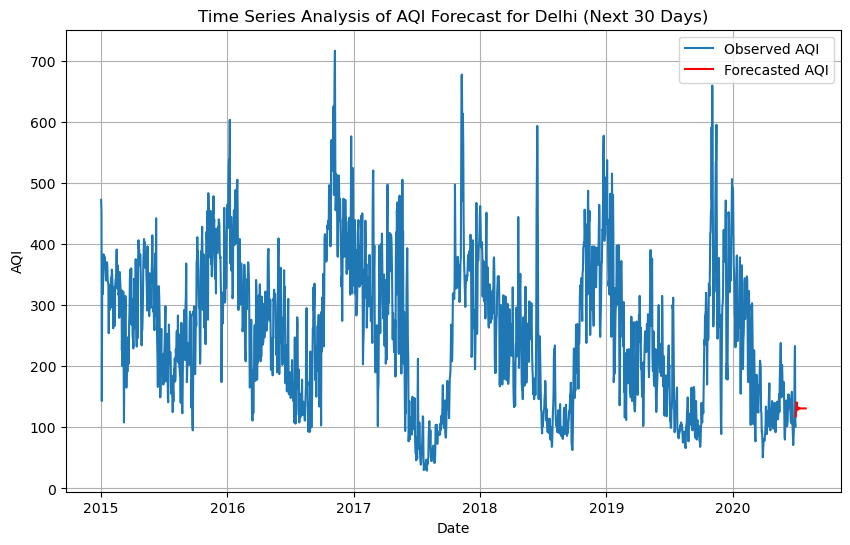

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model (ARIMA(p,d,q), where (p=5, d=1, q=0) is a basic configuration)
model = ARIMA(df_city_aqi['AQI'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the observed and forecasted AQI values
plt.figure(figsize=(10, 6))
plt.plot(df_city_aqi.index, df_city_aqi['AQI'], label='Observed AQI')
plt.plot(pd.date_range(df_city_aqi.index[-1], periods=30, freq='D'), forecast, label='Forecasted AQI', color='red')
plt.title('Time Series Analysis of AQI Forecast for Delhi (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


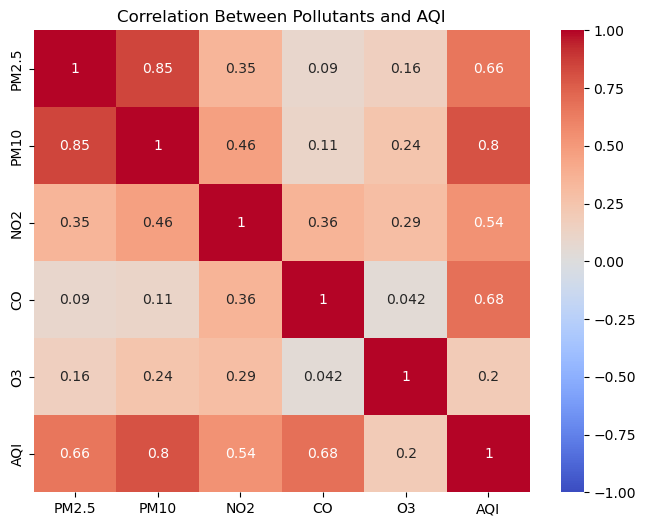

In [19]:
import seaborn as sns
import numpy as np

# Compute correlation matrix
corr_matrix = df[['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'AQI']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Pollutants and AQI')
plt.show()


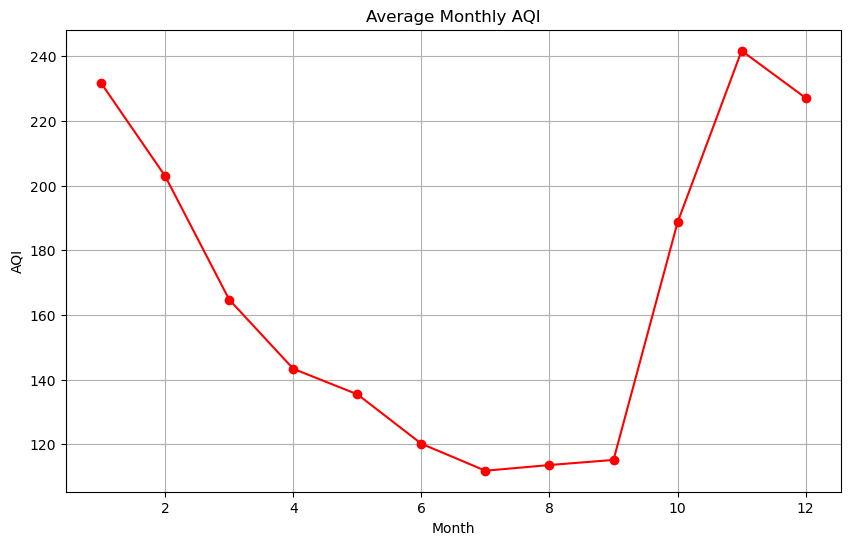

In [20]:
df['Month'] = df['Date'].dt.month

# Plot average AQI per month
monthly_aqi = df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_aqi.index, monthly_aqi.values, marker='o', color='red')
plt.title('Average Monthly AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


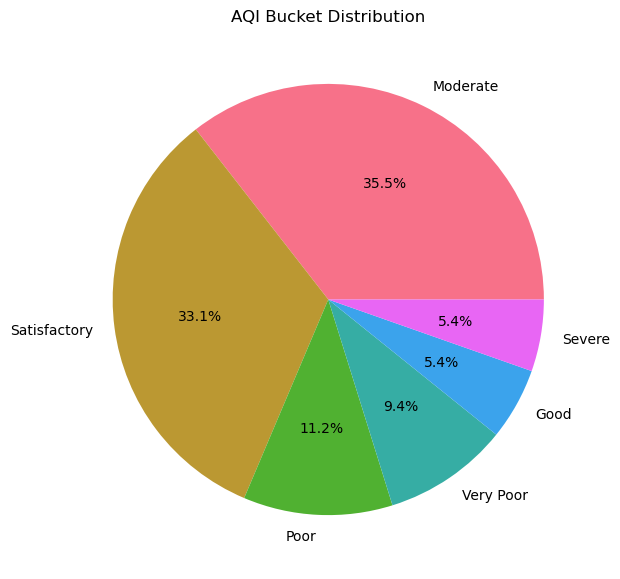

In [21]:
plt.figure(figsize=(7, 7))
df['AQI_Bucket'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.title('AQI Bucket Distribution')
plt.ylabel('')
plt.show()


C:\Users\Pyari Phuppu\AppData\Local\Temp\ipykernel_1128\175056002.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Mean Squared Error: 2486.2414584714265
R-Squared Score: 0.773652598847892


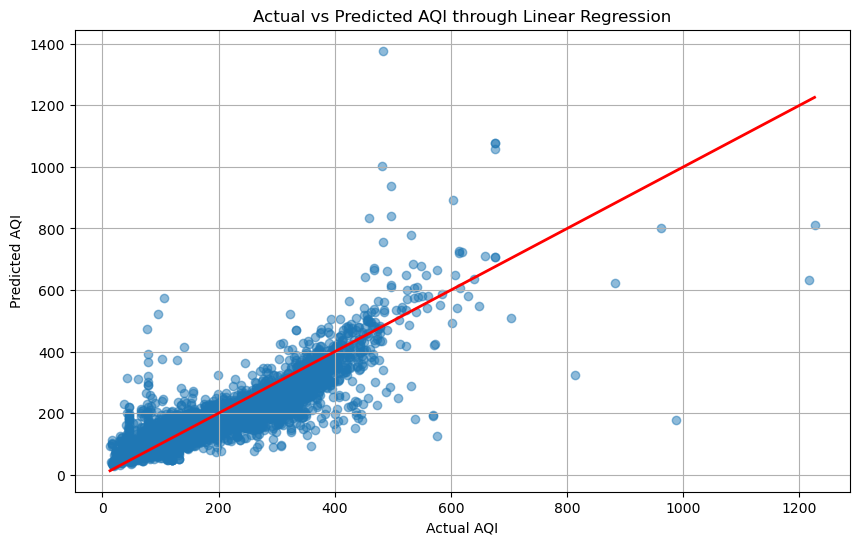

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#Fill missing values
df.fillna(method='ffill', inplace=True)

#Select the relevant columns 
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
target = 'AQI'

#Filter rows with valid data
df_filtered = df[features + [target]].dropna()

#Split the data into training and testing sets
X = df_filtered[features]
y = df_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create a Linear Regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared Score: {r2}')

# Step 10: Plot the predicted vs actual AQI values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted AQI through Linear Regression')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()


C:\Users\Pyari Phuppu\AppData\Local\Temp\ipykernel_1128\943587006.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Mean Squared Error: 1609.186881412551
R-Squared Score: 0.8534996400551806


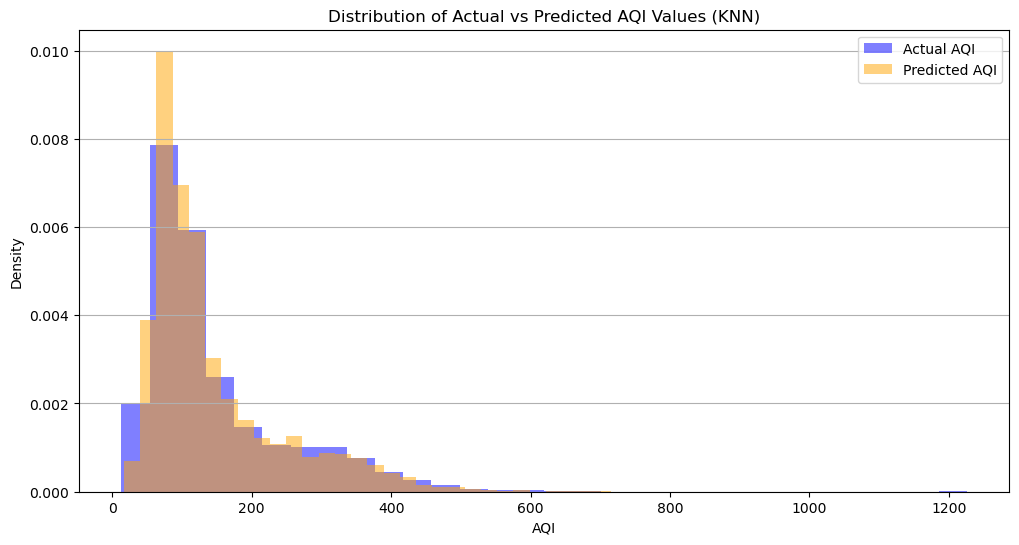

In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Select the relevant columns 
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
target = 'AQI'

# Filter rows with valid data
df_filtered = df[features + [target]].dropna()

# Split the data into training and testing sets
X = df_filtered[features]
y = df_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN Regressor model
model = KNeighborsRegressor(n_neighbors=5)  # You can change n_neighbors to tune the model

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared Score: {r2}')

# Step 10: Plot the distribution of actual vs predicted AQI values
plt.figure(figsize=(12, 6))

# Plot histogram for actual AQI values
plt.hist(y_test, bins=30, alpha=0.5, label='Actual AQI', color='blue', density=True)

# Plot histogram for predicted AQI values
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted AQI', color='orange', density=True)

plt.title('Distribution of Actual vs Predicted AQI Values (KNN)')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y')
plt.show()
